In [1]:
# Import required package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import preprocessing

import numpy as np

In [8]:
# read the dataset file
data = pd.read_csv('Data_16nov.csv')

# Deleting the first columns of sequence number
data.drop(data.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records:',data.shape[0]
print 'Number of attributes:',data.shape[1]


# Printing Column names
print([a for a in data.columns])
print(data.group.unique())

Number of records: 77
Number of attributes: 12
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']
['1AB' '1CD' '1GF' '1HI' '2ABC' '2DE' '2FGH' '2IJ' '3AB' '3CD']


In [3]:

# Deleting timestamp and group information
raw_data = data.drop(['timestamp','group'],axis=1)

In [4]:
# Stadardizing the dataset
std_rawdata = preprocessing.StandardScaler().fit_transform(raw_data)

# Minmax scaling of dataset
min_rawdata = preprocessing.MinMaxScaler().fit_transform(raw_data)

In [5]:

# Building PCA
pca = decomposition.PCA(n_components = 2)

# Building Isomap
iso = Isomap(n_components = 2)

# Building Factor Analysis
fa = decomposition.FactorAnalysis(n_components = 2)

# Building t-SNE
tsne = TSNE(n_components = 2)

# For MFA and MCA, I used another library in python. I wrote a separate script and save the results in a csv file

<IPython.core.display.Javascript object>


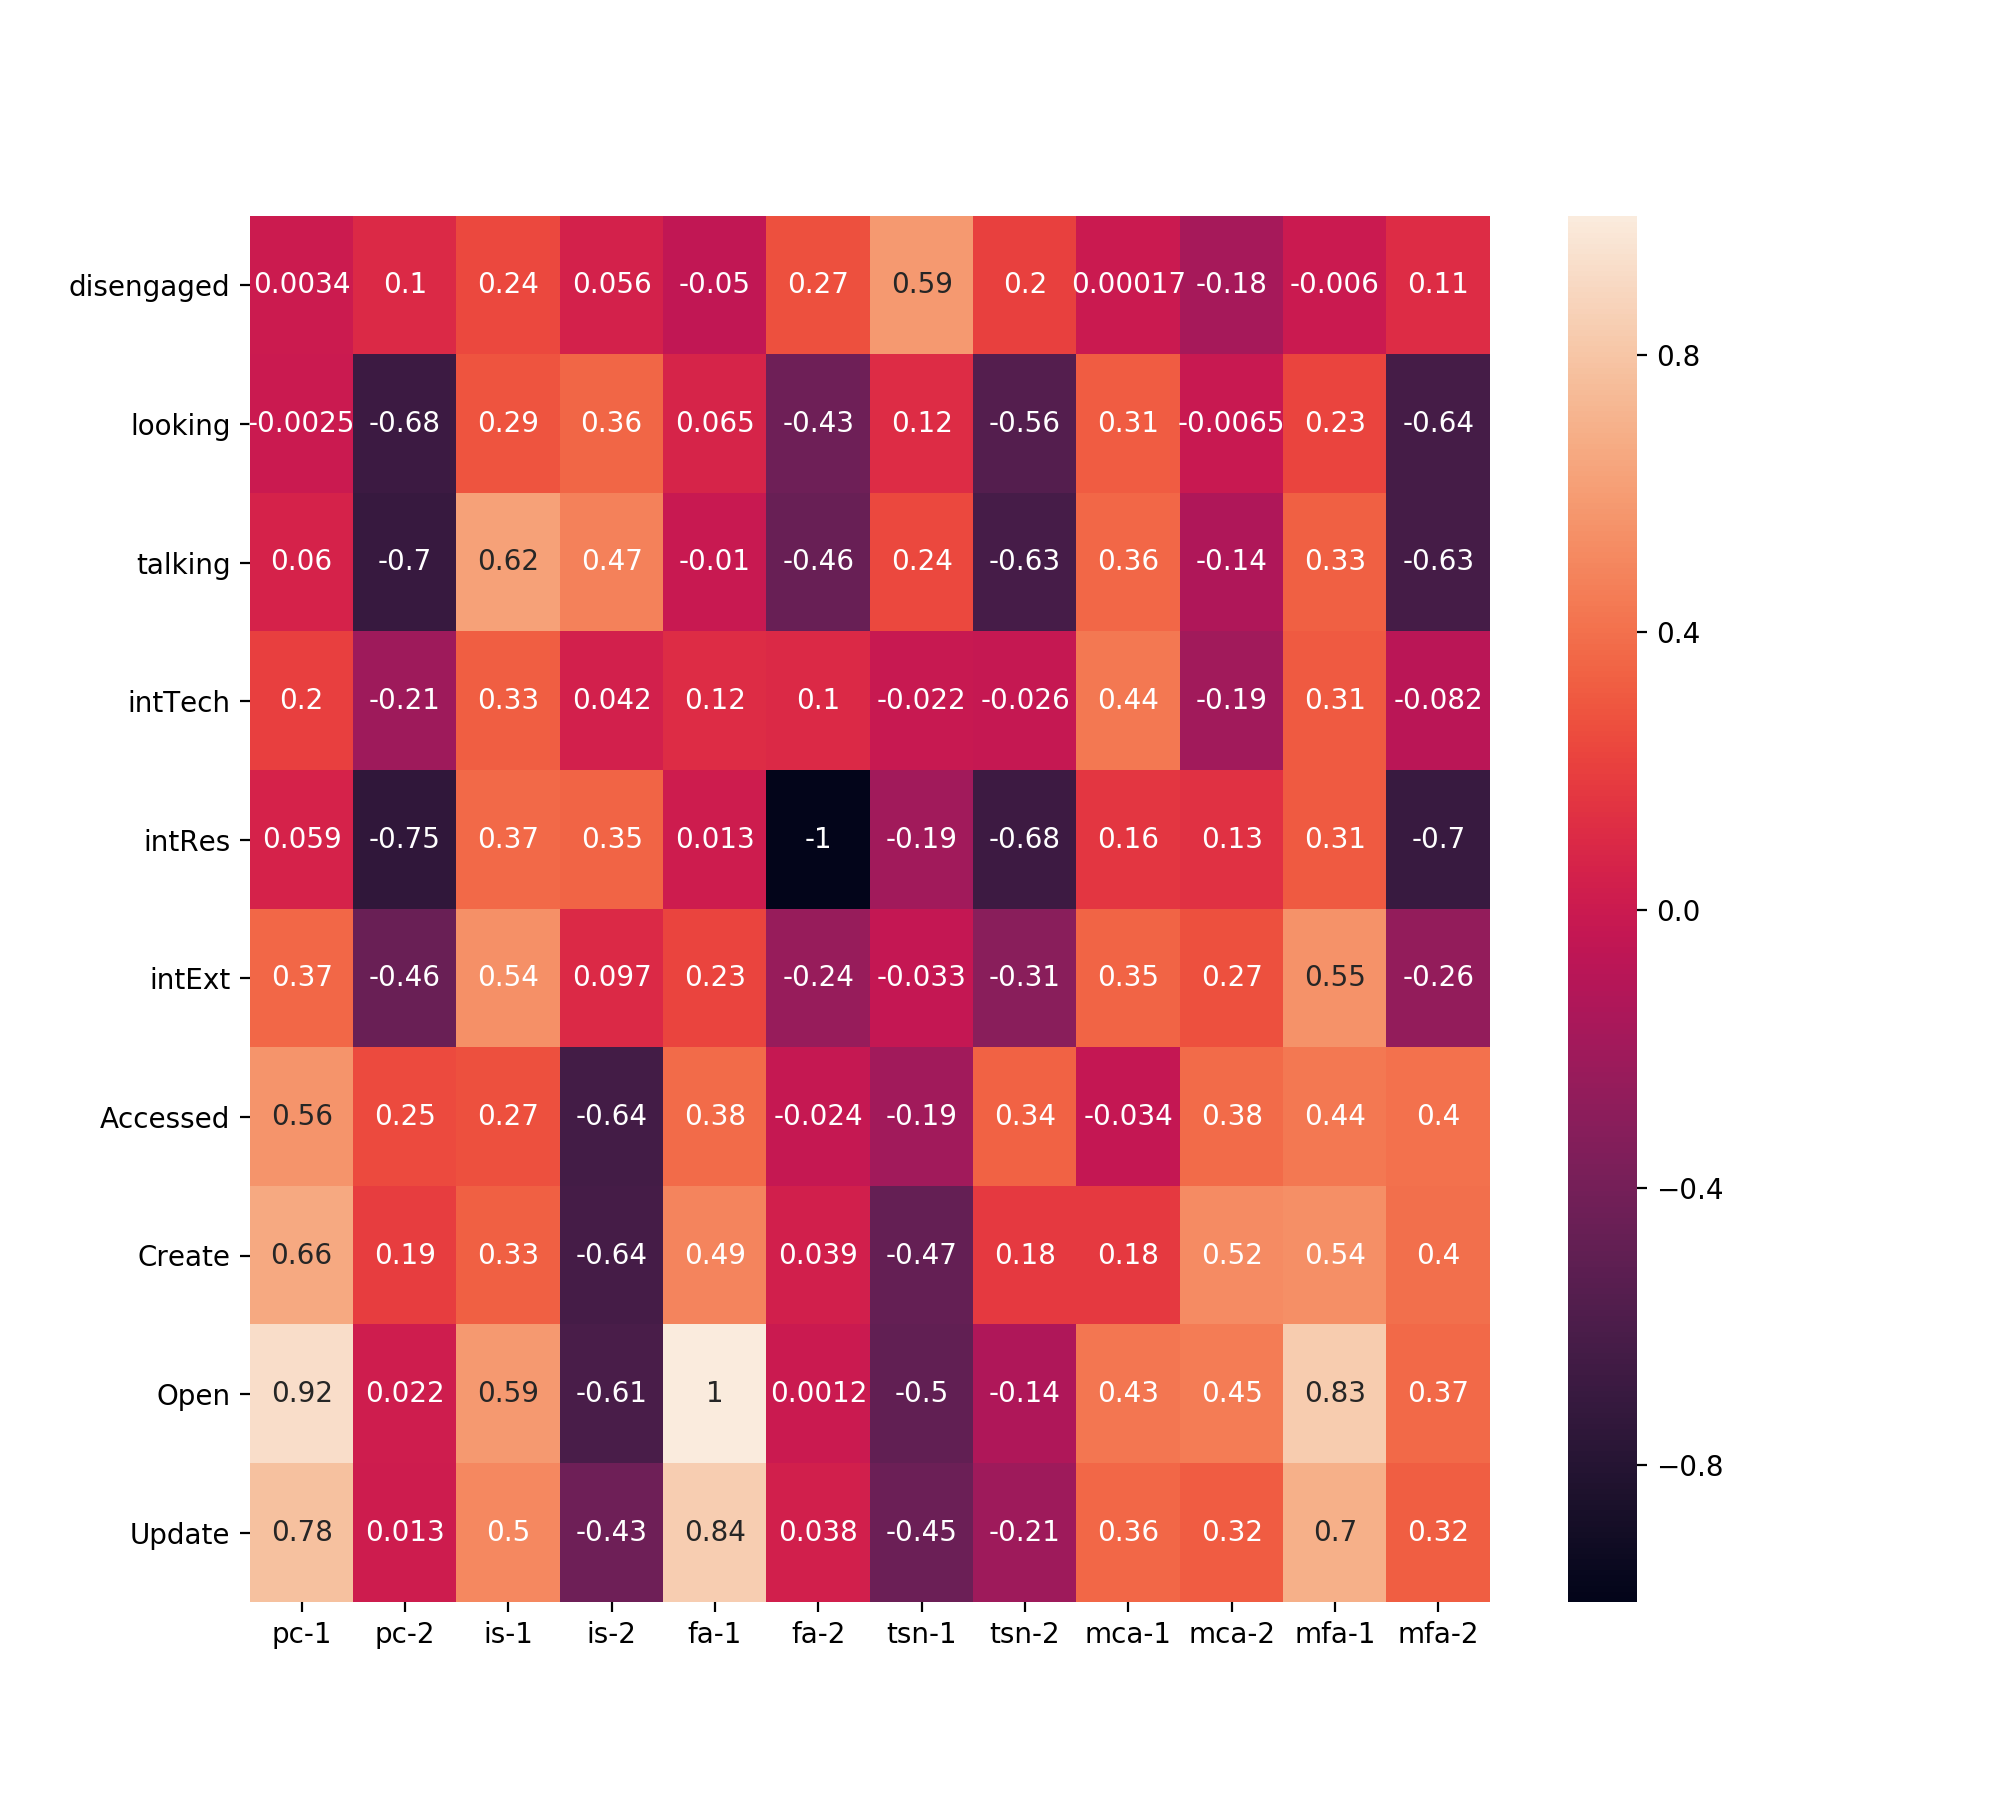

In [6]:
%matplotlib notebook

# Applying PCA on data 
pca_data2d = pca.fit_transform(std_rawdata)

# Applying Isomap on data
iso_data2d = iso.fit_transform(std_rawdata)


# Applying Factor Analysis on data
fa_data2d = fa.fit_transform(std_rawdata)

# Applying t-SNE on data
tsne_data2d = tsne.fit_transform(std_rawdata)

# on minmax scaling data
#pca_data2d = pca.fit_transform(min_rawdata)
#iso_data2d = iso.fit_transform(min_rawdata)
#fa_data2d = fa.fit_transform(min_rawdata)
#tsne_data2d = tsne.fit_transform(min_rawdata)




# Adding resultant dimensions of PCA to data
raw_data['pc-1'] = pca_data2d[:,0]
raw_data['pc-2'] = pca_data2d[:,1]

# Adding resultant dimensions of Isomap to data
raw_data['is-1'] = iso_data2d[:,0]
raw_data['is-2'] = iso_data2d[:,1]


# Adding resultant dimensions of Factor Analysis to data
raw_data['fa-1'] = fa_data2d[:,0]
raw_data['fa-2'] = fa_data2d[:,1]


# Adding resultant dimensions of t-SNE to data
raw_data['tsn-1'] = tsne_data2d[:,0]
raw_data['tsn-2'] = tsne_data2d[:,1]



# Adding MCA results ( As a separate library of python is used to produce MCA results and saved in mcaresults.csv file)
mca_df = pd.read_csv('mcaresult.csv')

# Adding results from MCA and MFA
#mca_df = pd.read_csv('mcaresult2.csv')

mfa_df = pd.read_csv('mfaresult2.csv')


# Adding resultant dimensions of MCA to data
raw_data['mca-1'] = mca_df.iloc[:,1]
raw_data['mca-2'] = mca_df.iloc[:,2]


# Adding resultant dimensions of MFA to data
raw_data['mfa-1'] = mfa_df.iloc[:,1]
raw_data['mfa-2'] = mfa_df.iloc[:,2]


# Plotting correlation table 
plt.figure(figsize=(10,9))
sns.heatmap(raw_data.corr().iloc[0:10,-12:],annot=True)


# Visualization of Dimension reduced data and Interpretation

<IPython.core.display.Javascript object>


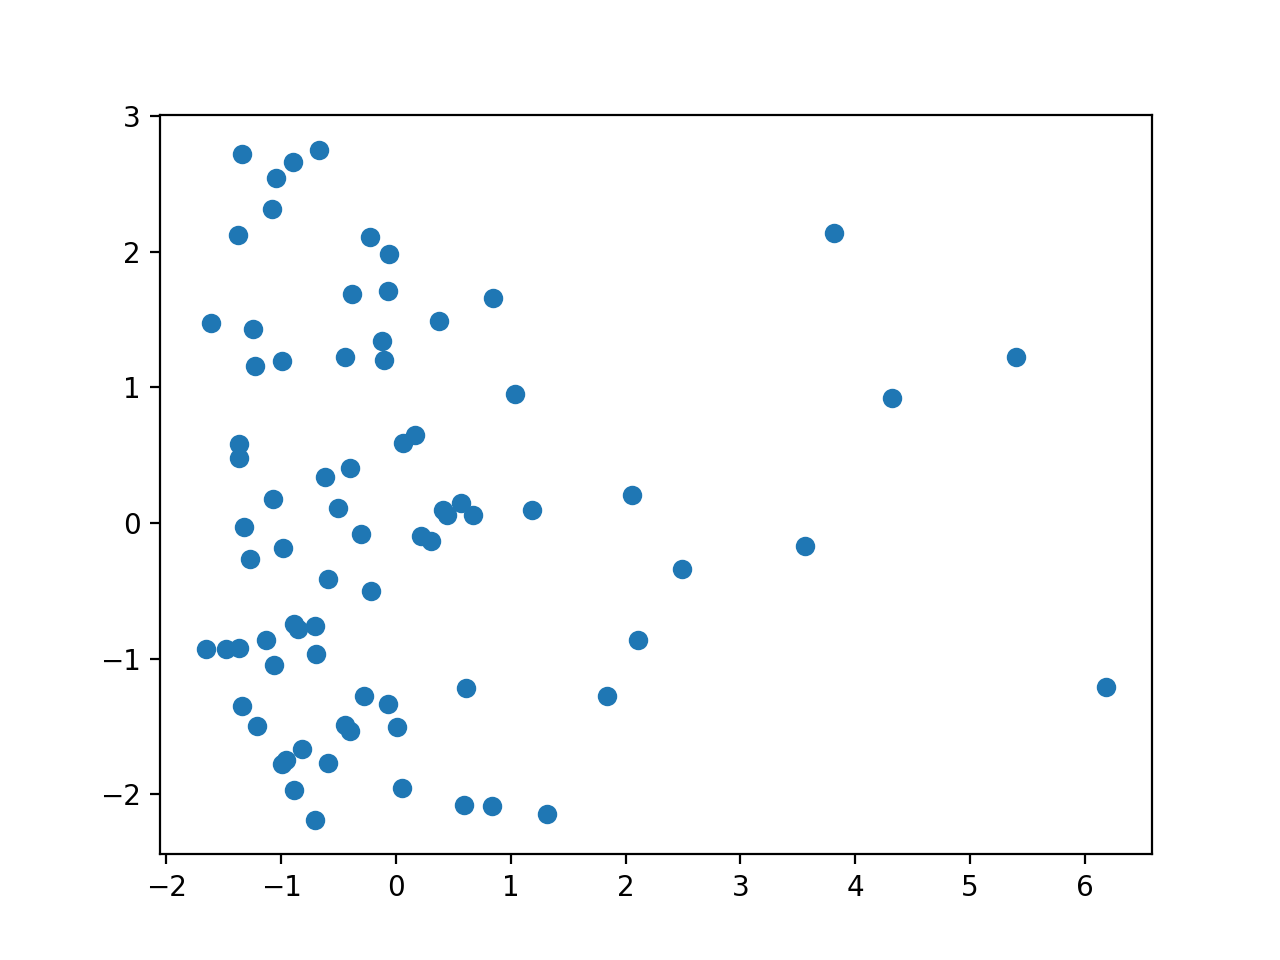

In [7]:
plt.figure()
plt.scatter(pca_data2d[:,0],pca_data2d[:,1])
plt.show()

### Group wise visualization with labels 

### Group 1AB

In [16]:
pca_data2d[data.group=='1AB']

array([[-1.22440517,  1.16047778],
       [ 0.8445131 ,  1.66229928],
       [-0.88471257, -0.74706954],
       [-0.70402643, -0.75615465],
       [-1.36970829,  0.4791959 ],
       [-1.36655937,  0.58515581],
       [ 2.49329633, -0.33897651],
       [-0.39941636, -1.52977669],
       [-0.39718036,  0.40717618],
       [-1.07509459,  0.17449275],
       [-1.32365549, -0.03152638]])

## Clustering the PCA  dimensions

In this section, we will explore the clustering results on the dimensions obtained by applying the PCA. 

In [265]:
# Kmeans over PCA results
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(raw_data.loc[:,'pc-1':'pc-2'])

#for i in range(len(data)):
#    ax.annotate((data.iloc[i,1],i),xy=(raw_data.iloc[i,10],raw_data.iloc[i,11]),xytext=(raw_data.iloc[i,10],raw_data.iloc[i,11]))

print kmeans1.cluster_centers_

[[-0.36705205 -0.94659045]
 [ 3.74363036  0.23878787]
 [-0.54483865  1.49204178]]


<IPython.core.display.Javascript object>


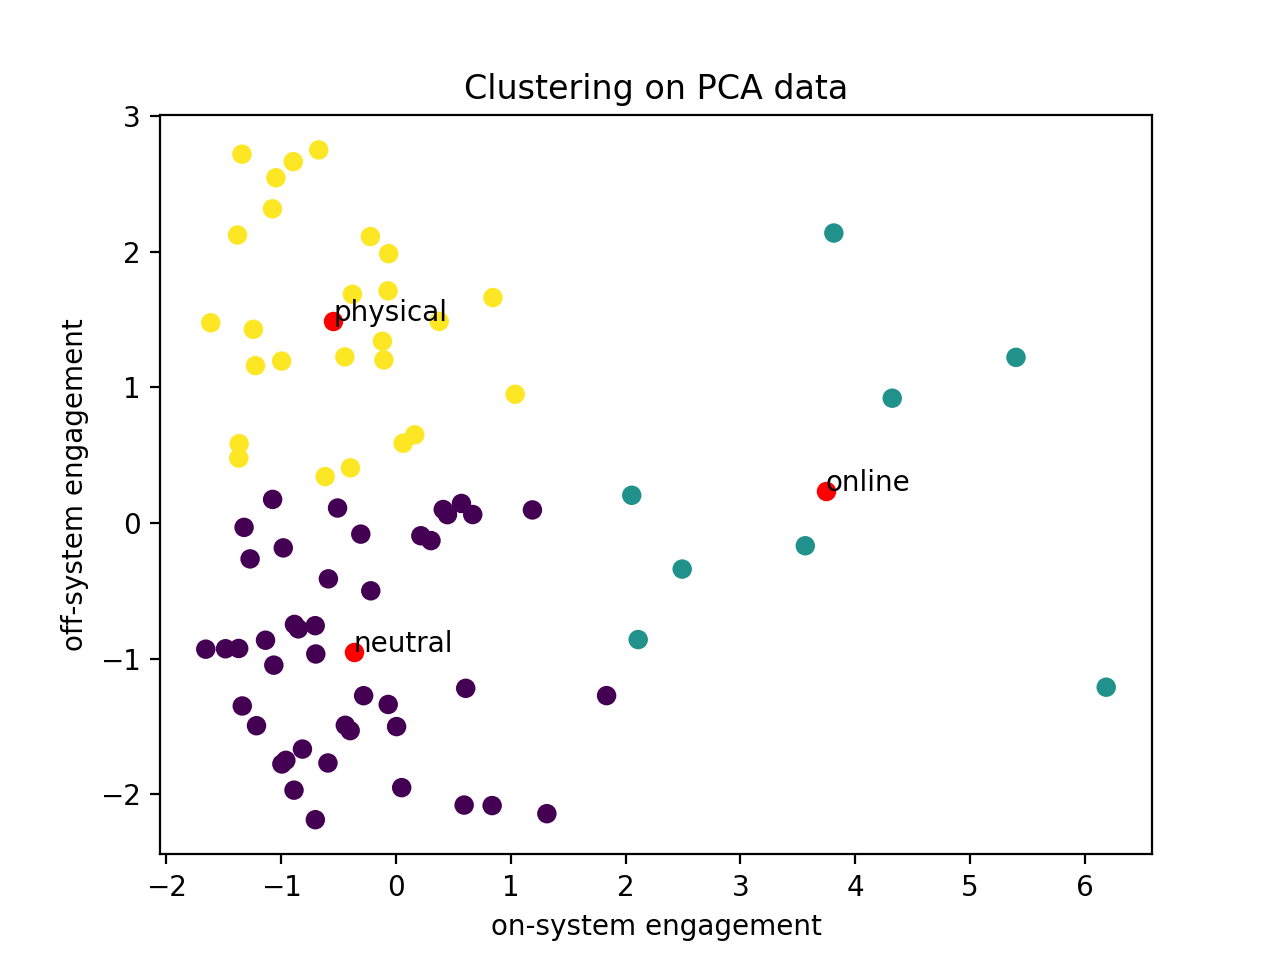

{0: 'neutral', 1: 'online', 2: 'physical'}
[[-0.36705205 -0.94659045]
 [ 3.74363036  0.23878787]
 [-0.54483865  1.49204178]]
[[-0.367052049013893, -0.946590446819481], [3.7436303646558335, 0.2387878656150683], [-0.5448386465249722, 1.4920417803198898]]


In [266]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(raw_data.loc[:,'pc-1'],raw_data.loc[:,'pc-2'],c=kmeans1.labels_)

plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='red')

clusters = kmeans1.cluster_centers_.tolist()
for cluster in clusters:
    physical = 0
    online = 0
    neutral = 0
    for i in range(len(clusters)):
        if clusters[i][0]>0 and clusters[i][1]>0:
            online = i
        if clusters[i][0]<0 and clusters[i][1]>0:
            physical = i
    for i in range(len(clusters)):
        if i!=online and i!=physical:
            neutral=i
    labels = {physical:'physical',online:'online',neutral:'neutral'}

#cluster_names = ['physical-low','online-high','online-low','physical-high']
print(labels)
print(kmeans1.cluster_centers_)
print(clusters)

for i in range(len(kmeans1.cluster_centers_)):
    ax.annotate(labels[i],xy=(kmeans1.cluster_centers_[i,0] ,kmeans1.cluster_centers_[i,1]),xytext=(kmeans1.cluster_centers_[i,0] ,kmeans1.cluster_centers_[i,1]))

plt.xlabel('on-system engagement')
plt.ylabel('off-system engagement')
plt.title('Clustering on PCA data')
plt.show()

## Clustering the t-SNE dimensions

In [209]:
# Kmeans over t-SNE results
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(raw_data.loc[:,'tsn-1':'tsn-2'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[-4.330930971330211, 4.968529201322987], [0.10646380098729358, 5.100248155922726], [-2.6163864907096412, 0.9877279752810653]]


<IPython.core.display.Javascript object>


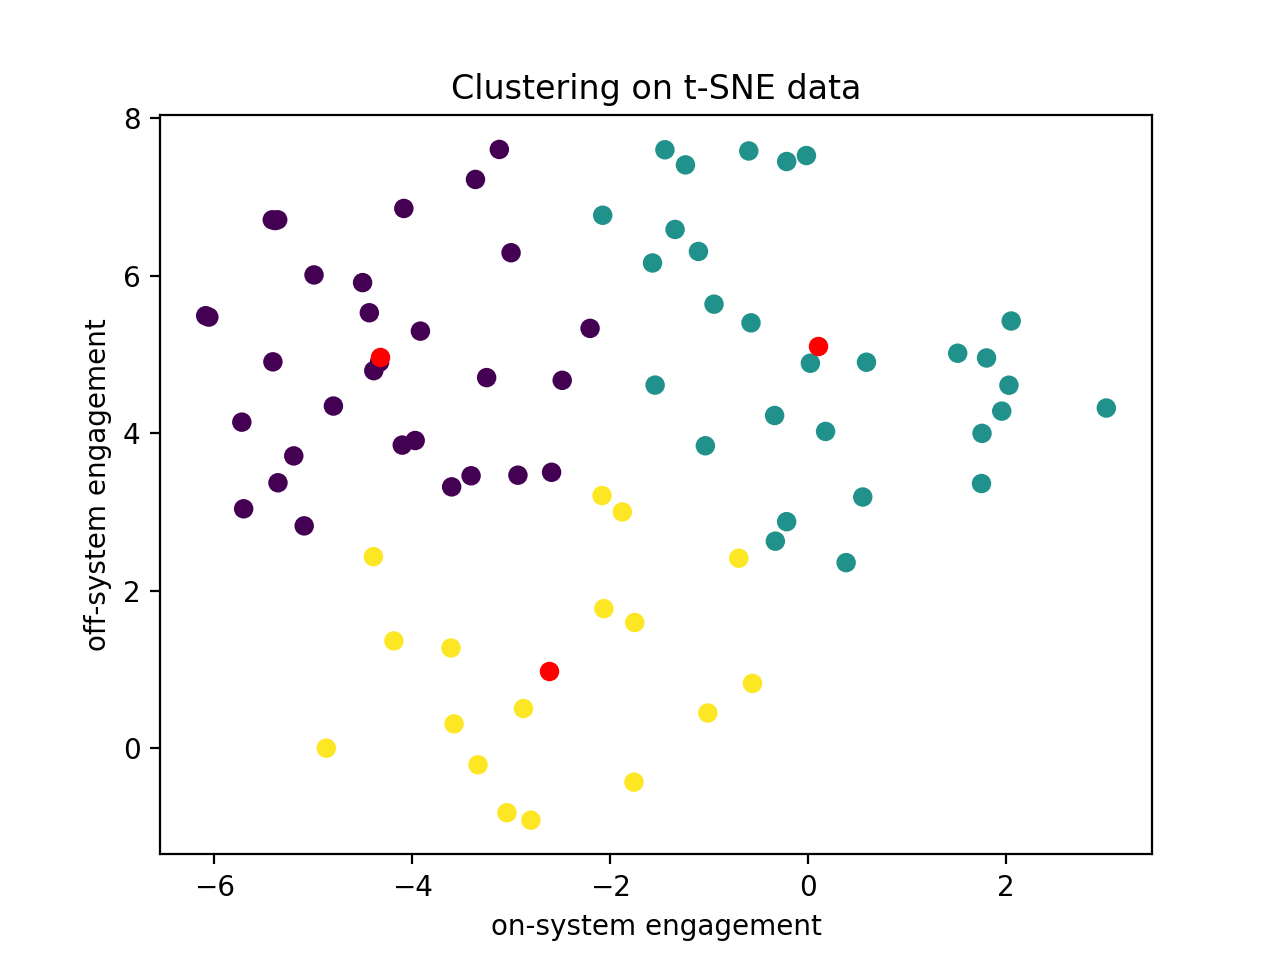

In [212]:
clusters = kmeans2.cluster_centers_.tolist()
print clusters
for cluster in clusters:
    physical = 0
    online = 0
    neutral = 0
    for i in range(len(clusters)):
        if clusters[i][0]>0 and clusters[i][1]>0:
            online = i
        if clusters[i][0]<0 and clusters[i][1]>0:
            physical = i
    for i in range(len(clusters)):
        if i!=online and i!=physical:
            neutral=i
    labels = {physical:'physical',online:'online',neutral:'neutral'}


fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(raw_data.loc[:,'tsn-1'],raw_data.loc[:,'tsn-2'],c=kmeans2.labels_)
ax.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], color='red')

#cluster_names = ['neutral','physical','online']
#for i in range(len(kmeans1.cluster_centers_)):
#    ax.annotate(labels[i],xy=(kmeans2.cluster_centers_[i,0] ,kmeans2.cluster_centers_[i,1]),xytext=(kmeans2.cluster_centers_[i,0] ,kmeans2.cluster_centers_[i,1]))

plt.xlabel('on-system engagement')
plt.ylabel('off-system engagement')
plt.title('Clustering on t-SNE data')
plt.show()

## Clustering the MFA dimensions

In [240]:
kmeans3 = KMeans(n_clusters = 4)
kmeans3.fit(raw_data.loc[:,'mfa-1':'mfa-2'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>


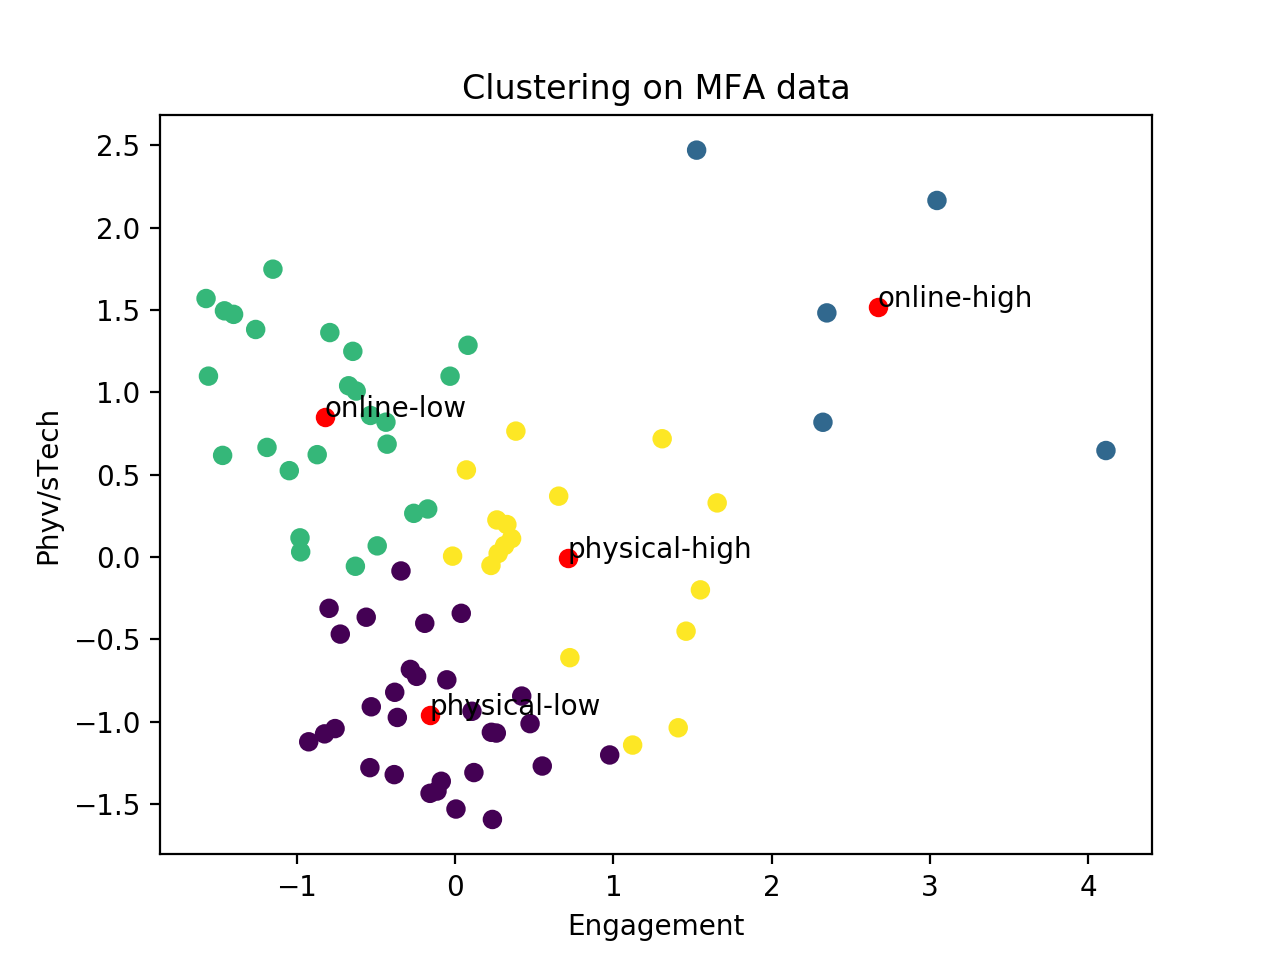

In [251]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(raw_data.loc[:,'mfa-1'],raw_data.loc[:,'mfa-2'],c=kmeans3.labels_)
ax.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], color='red')

cluster_names = ['physical-low','online-high','online-low','physical-high']
for i in range(len(kmeans3.cluster_centers_)):
    ax.annotate(cluster_names[i],xy=(kmeans3.cluster_centers_[i,0] ,kmeans3.cluster_centers_[i,1]),xytext=(kmeans3.cluster_centers_[i,0] ,kmeans3.cluster_centers_[i,1]))

plt.xlabel('Engagement')
plt.ylabel('Phyv/sTech')
plt.title('Clustering on MFA data')
plt.show()
plt.savefig('mfa with 4 clusters.png')

# Transitioning behavior for each group on PCA data

In this section, we will depict transition behavior of each group seperately.

### Group 1AB

In [239]:
ab1 = raw_data.loc[data['group']=='1AB','pc-1':'pc-2']

clusters = kmeans1.cluster_centers_.tolist()
seq = kmeans1.predict(ab1)
seq = seq.tolist()
print 'cluster0',kmeans1.cluster_centers_[0]
print 'cluster1',kmeans1.cluster_centers_[1]
print 'cluster2',kmeans1.cluster_centers_[2]
print(seq)

cluster0 [-0.54483865  1.49204178]
cluster1 [-0.36705205 -0.94659045]
cluster2 [3.74363036 0.23878787]
[0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1]


In [222]:
import numpy as np


def get_matrix(clusters,seq):
    transition_matrix = np.zeros((len(clusters),len(clusters)))
    cluster_probability = np.zeros(len(clusters))
    
    for i in range(len(clusters)):
        cluster_probability[i] = seq.count(i)/float(len(seq))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            for index in range(len(seq)-1):
                if seq[index] == i and seq[index+1] == j:
                    transition_matrix[i,j] += 1
    
    for cluster in clusters:
        physical = 0
        online = 0
        neutral = 0
        for i in range(len(clusters)):
            if clusters[i][0]>0 and clusters[i][1]>0:
                online = i
            if clusters[i][0]<0 and clusters[i][1]>0:
                physical = i
        for i in range(len(clusters)):
            if i!=online and i!=physical:
                neutral=i
        labels = {physical:'physical',online:'online',neutral:'neutral'}
    return cluster_probability, transition_matrix,labels

#dict((i, seq.count(i)) for i in seq)


get_matrix(clusters,seq)

(array([0.45454545, 0.45454545, 0.09090909]), array([[2., 2., 1.],
        [2., 2., 0.],
        [0., 1., 0.]]), {0: 'physical', 1: 'neutral', 2: 'online'})

In [153]:
import networkx as nx

<IPython.core.display.Javascript object>


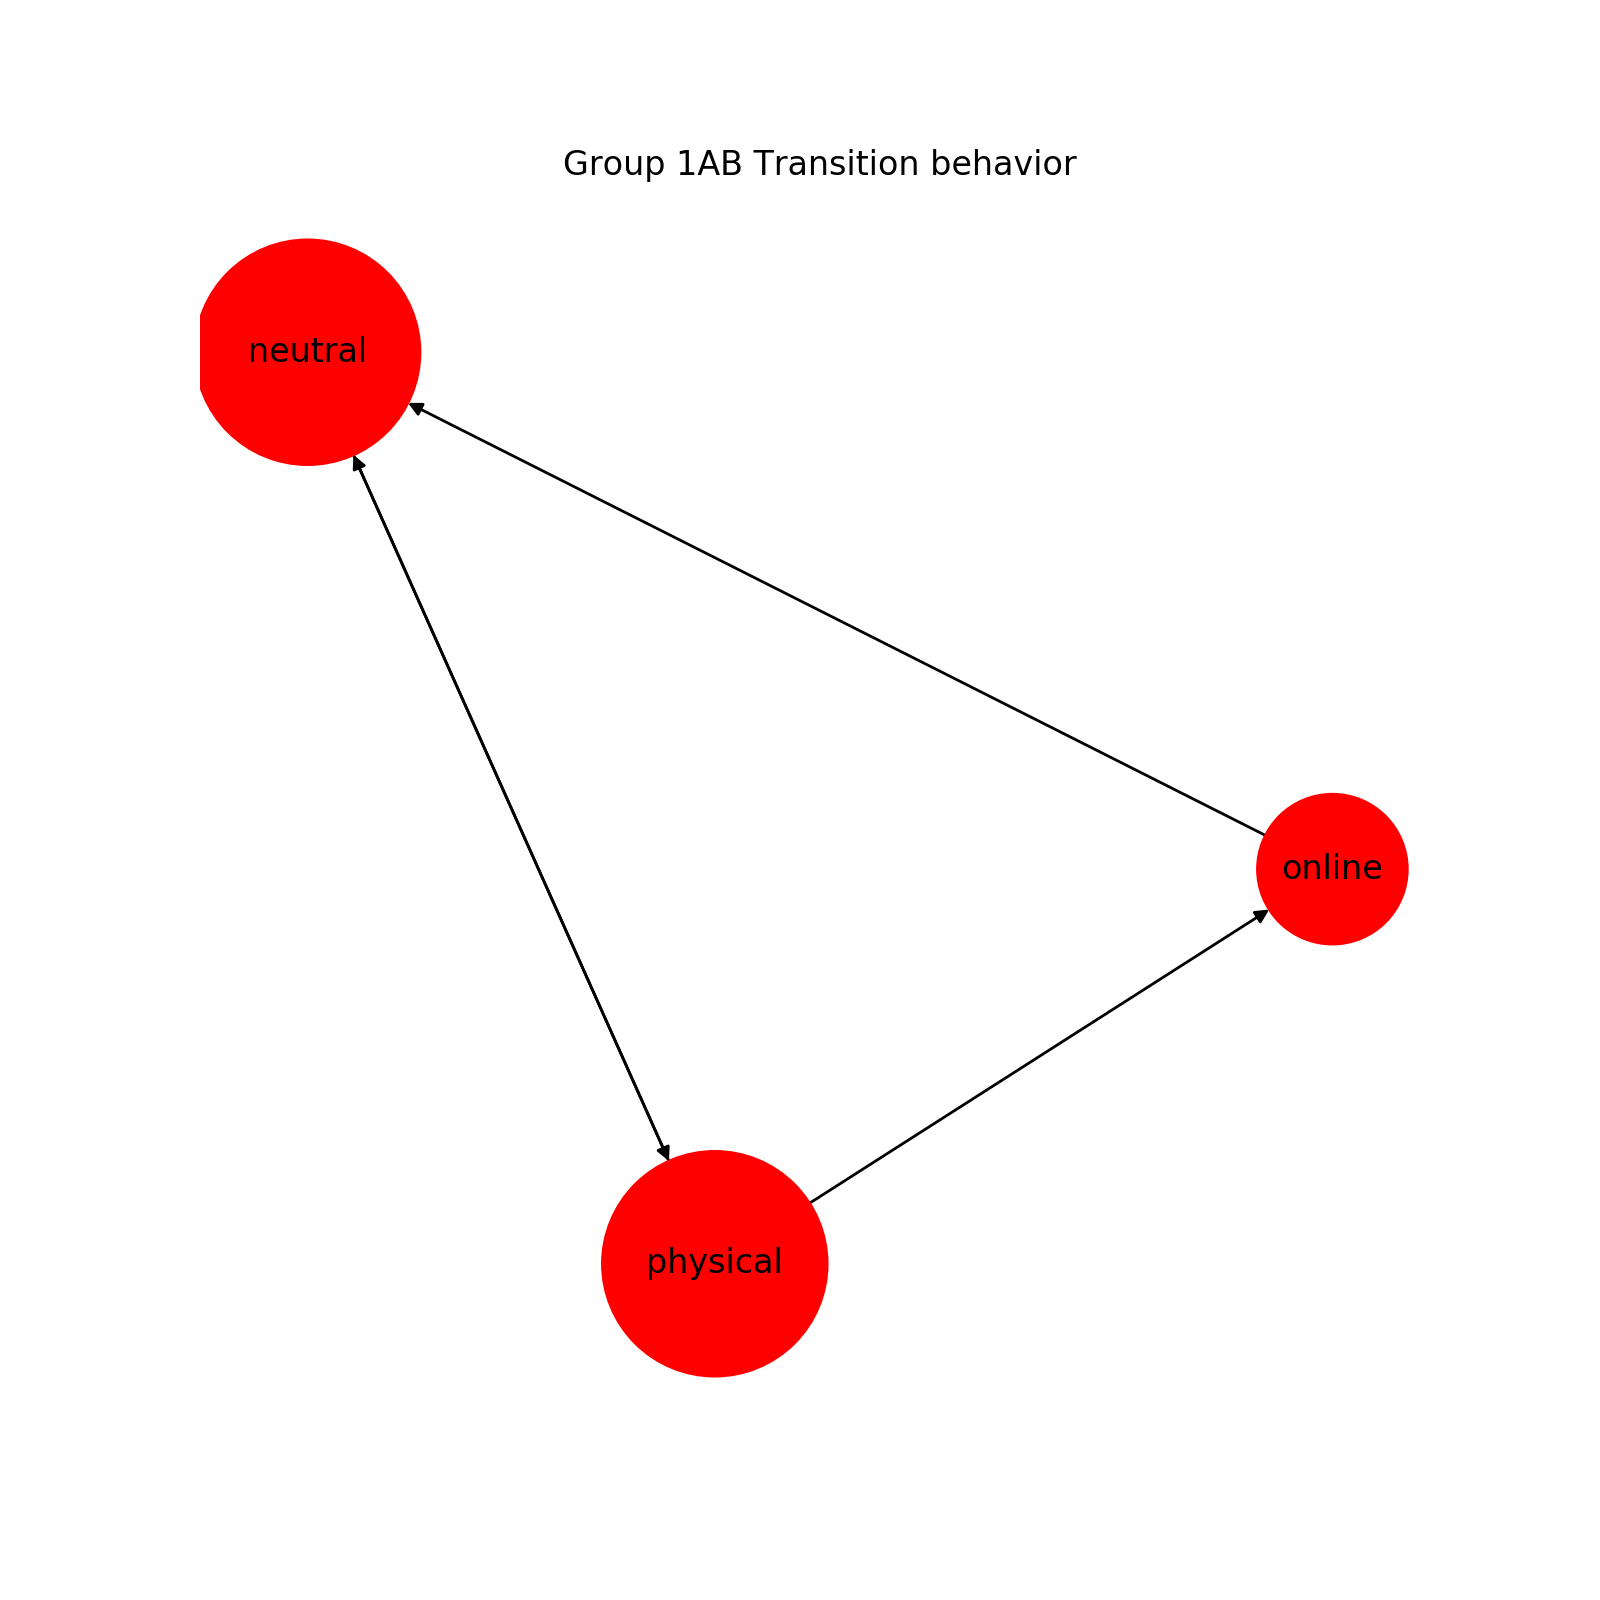

[2909.090909090909, 6545.454545454545, 6545.454545454545]


In [234]:

%matplotlib notebook

prob,tr_prob,labels = get_matrix(clusters,seq)
plt.figure(figsize=(8,8))
plt.axis("off")
g = nx.DiGraph()
for i in range(len(prob)):
    for j in range(len(prob)):
        if tr_prob[i,j] !=0:
            g.add_edge(i,j,weight=tr_prob[i,j])
size =list()

for i in range(len(prob)):
    size.append(2000+prob[i]*10000)
nx.draw_networkx(g,labels=labels,with_labels=True,node_size=size)
plt.title('Group 1AB Transition behavior')    
plt.show()
print size


## Group 1GF Behavior

cluster0 [-0.74531821  0.83744603]
cluster1 [ 0.05377334 -0.73909929]
cluster2 [2.23313893 1.05389091]
[2, 1, 1, 0, 2, 1, 0]
[0.28571429 0.42857143 0.28571429] [[0. 0. 1.]
 [2. 1. 0.]
 [0. 2. 0.]] {0: 'physical', 1: 'neutral', 2: 'online'}


<IPython.core.display.Javascript object>


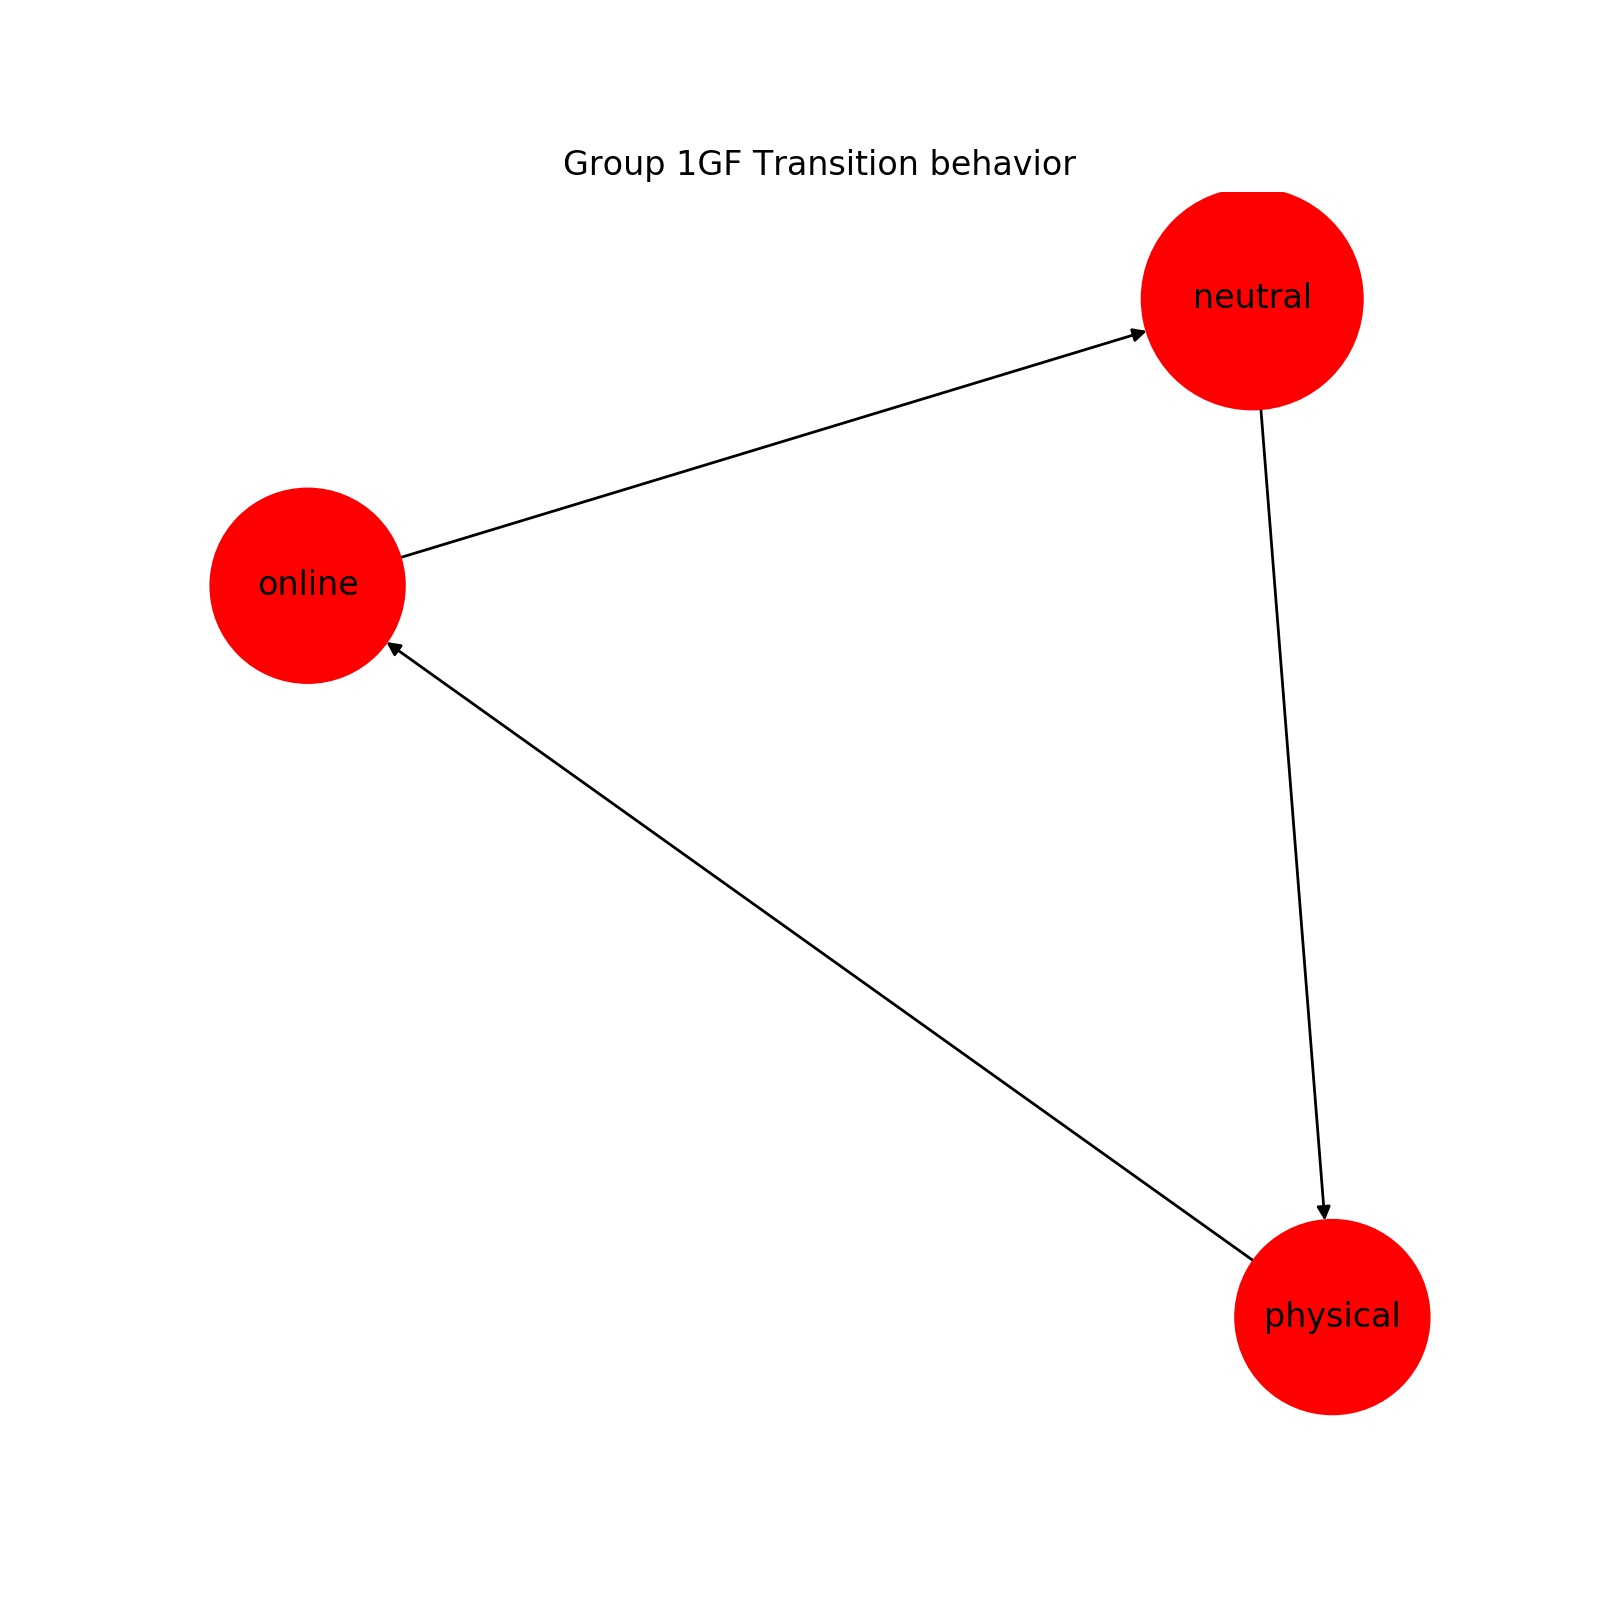

line-1
[4857.142857142857, 6285.714285714285, 4857.142857142857]


In [195]:
ab1 = raw_data.loc[data['group']=='1GF','pc-1':'pc-2']
seq = kmeans1.predict(ab1)
clusters = kmeans1.cluster_centers_.tolist()
seq = seq.tolist()
print 'cluster0',kmeans1.cluster_centers_[0]
print 'cluster1',kmeans1.cluster_centers_[1]
print 'cluster2',kmeans1.cluster_centers_[2]
print(seq)
prob,tr_prob,labels = get_matrix(clusters,seq)
print prob,tr_prob,labels
plt.figure(figsize=(8,8))
plt.axis("off")
g = nx.DiGraph()
for i in range(len(prob)):
    for j in range(len(prob)):
        if tr_prob[i,j] !=0:
            g.add_edge(i,j,weight=tr_prob[i,j])
size =list()
print('line-1')
for i in range(len(prob)):
    size.append(2000+prob[i]*10000)
nx.draw_networkx(g,labels=labels,with_labels=True,node_size=size)
plt.title('Group 1GF Transition behavior')    
plt.show()
print size


## 2ABC group behavior

cluster0 [-0.74531821  0.83744603]
cluster1 [ 0.05377334 -0.73909929]
cluster2 [2.23313893 1.05389091]
[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0.69230769 0.23076923 0.07692308] [[6. 2. 0.]
 [1. 1. 1.]
 [1. 0. 0.]] {0: 'physical', 1: 'neutral', 2: 'online'}


<IPython.core.display.Javascript object>


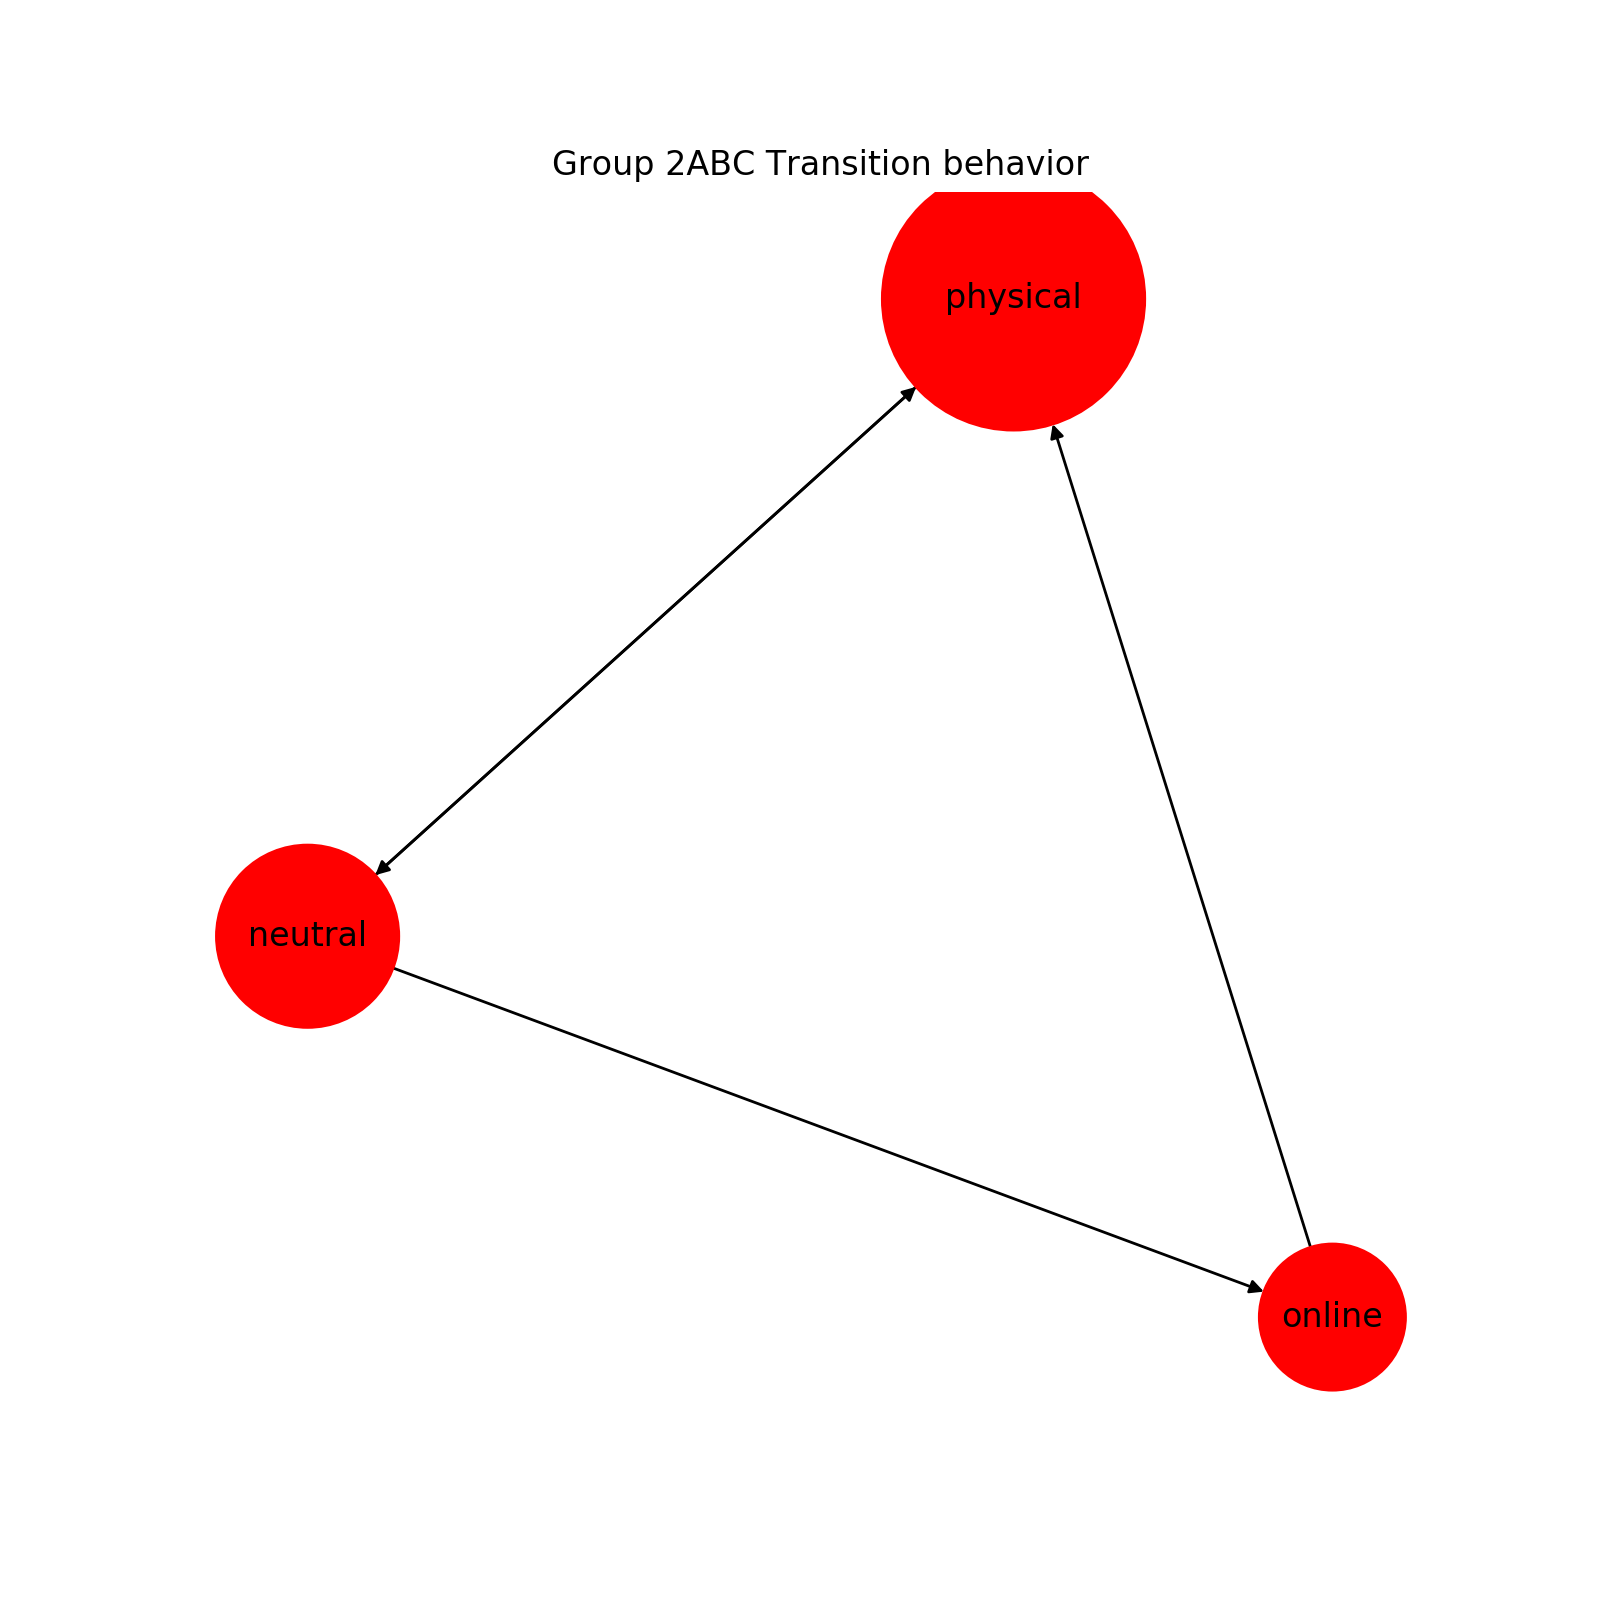

line-1
[8923.076923076922, 4307.692307692308, 2769.2307692307695]


In [199]:
ab1 = raw_data.loc[data['group']=='2ABC','pc-1':'pc-2']
seq = kmeans1.predict(ab1)
clusters = kmeans1.cluster_centers_.tolist()
seq = seq.tolist()
print 'cluster0',kmeans1.cluster_centers_[0]
print 'cluster1',kmeans1.cluster_centers_[1]
print 'cluster2',kmeans1.cluster_centers_[2]
print(seq)
prob,tr_prob,labels = get_matrix(clusters,seq)
print prob,tr_prob,labels
plt.figure(figsize=(8,8))
plt.axis("off")
g = nx.DiGraph()
for i in range(len(prob)):
    for j in range(len(prob)):
        if tr_prob[i,j] !=0:
            g.add_edge(i,j,weight=tr_prob[i,j])
size =list()
print('line-1')
for i in range(len(prob)):
    size.append(2000+prob[i]*10000)
nx.draw_networkx(g,labels=labels,with_labels=True,node_size=size)
plt.title('Group 2ABC Transition behavior')    
plt.show()
print size

## 2DE transition behavior

cluster0 [-0.74531821  0.83744603]
cluster1 [ 0.05377334 -0.73909929]
cluster2 [2.23313893 1.05389091]
[0, 1, 0, 2, 1, 1]
[0.33333333 0.5        0.16666667] [[0. 1. 1.]
 [1. 1. 0.]
 [0. 1. 0.]] {0: 'physical', 1: 'neutral', 2: 'online'}


<IPython.core.display.Javascript object>


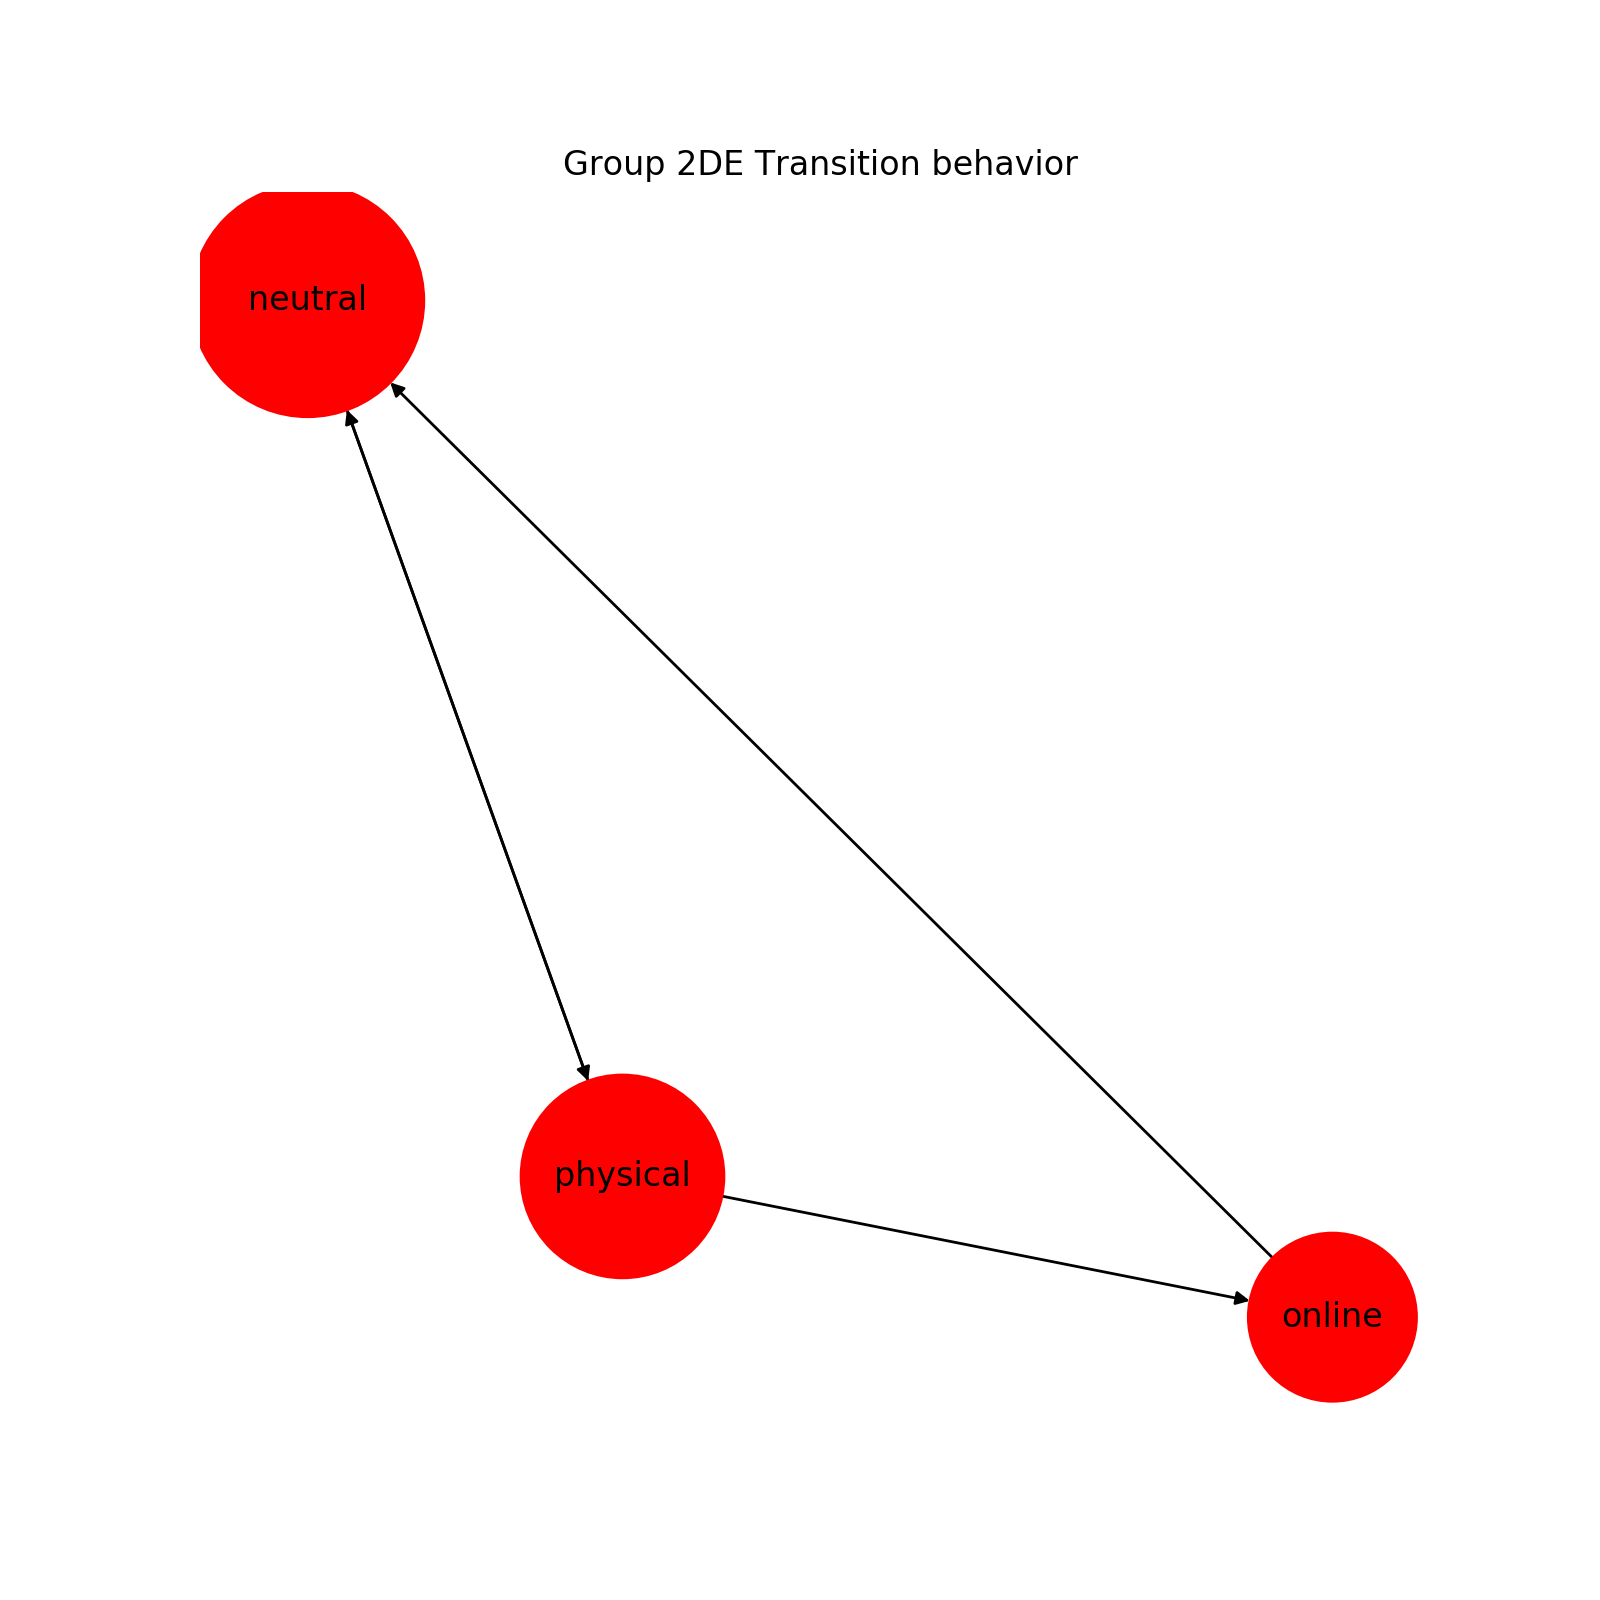

line-1
[5333.333333333333, 7000.0, 3666.6666666666665]


In [200]:
ab1 = raw_data.loc[data['group']=='2DE','pc-1':'pc-2']
seq = kmeans1.predict(ab1)
clusters = kmeans1.cluster_centers_.tolist()
seq = seq.tolist()
print 'cluster0',kmeans1.cluster_centers_[0]
print 'cluster1',kmeans1.cluster_centers_[1]
print 'cluster2',kmeans1.cluster_centers_[2]
print(seq)
prob,tr_prob,labels = get_matrix(clusters,seq)
print prob,tr_prob,labels
plt.figure(figsize=(8,8))
plt.axis("off")
g = nx.DiGraph()
for i in range(len(prob)):
    for j in range(len(prob)):
        if tr_prob[i,j] !=0:
            g.add_edge(i,j,weight=tr_prob[i,j])
size =list()
print('line-1')
for i in range(len(prob)):
    size.append(2000+prob[i]*10000)
nx.draw_networkx(g,labels=labels,with_labels=True,node_size=size)
plt.title('Group 2DE Transition behavior')    
plt.show()
print size

## Transition Behavior on MFA data

In [253]:

def get_probs(clusters,seq):
    transition_matrix = np.zeros((len(clusters),len(clusters)))
    cluster_probability = np.zeros(len(clusters))
    
    for i in range(len(clusters)):
        cluster_probability[i] = seq.count(i)/float(len(seq))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            for index in range(len(seq)-1):
                if seq[index] == i and seq[index+1] == j:
                    transition_matrix[i,j] += 1
    return cluster_probability, transition_matrix



In [252]:
ab1 = raw_data.loc[data['group']=='1AB','mfa-1':'mfa-2']

clusters = kmeans3.cluster_centers_.tolist()
seq = kmeans3.predict(ab1)
seq = seq.tolist()
print 'cluster0',kmeans3.cluster_centers_[0]
print 'cluster1',kmeans3.cluster_centers_[1]
print 'cluster2',kmeans3.cluster_centers_[2]
print 'cluster3',kmeans3.cluster_centers_[3]
print(seq)

cluster0 [-0.16172291 -0.95817276]
cluster1 [2.67049242 1.51694272]
cluster2 [-0.82313418  0.85272149]
cluster3 [ 0.71044587 -0.00926872]
[2, 2, 0, 0, 2, 2, 3, 0, 2, 2, 0]


<IPython.core.display.Javascript object>


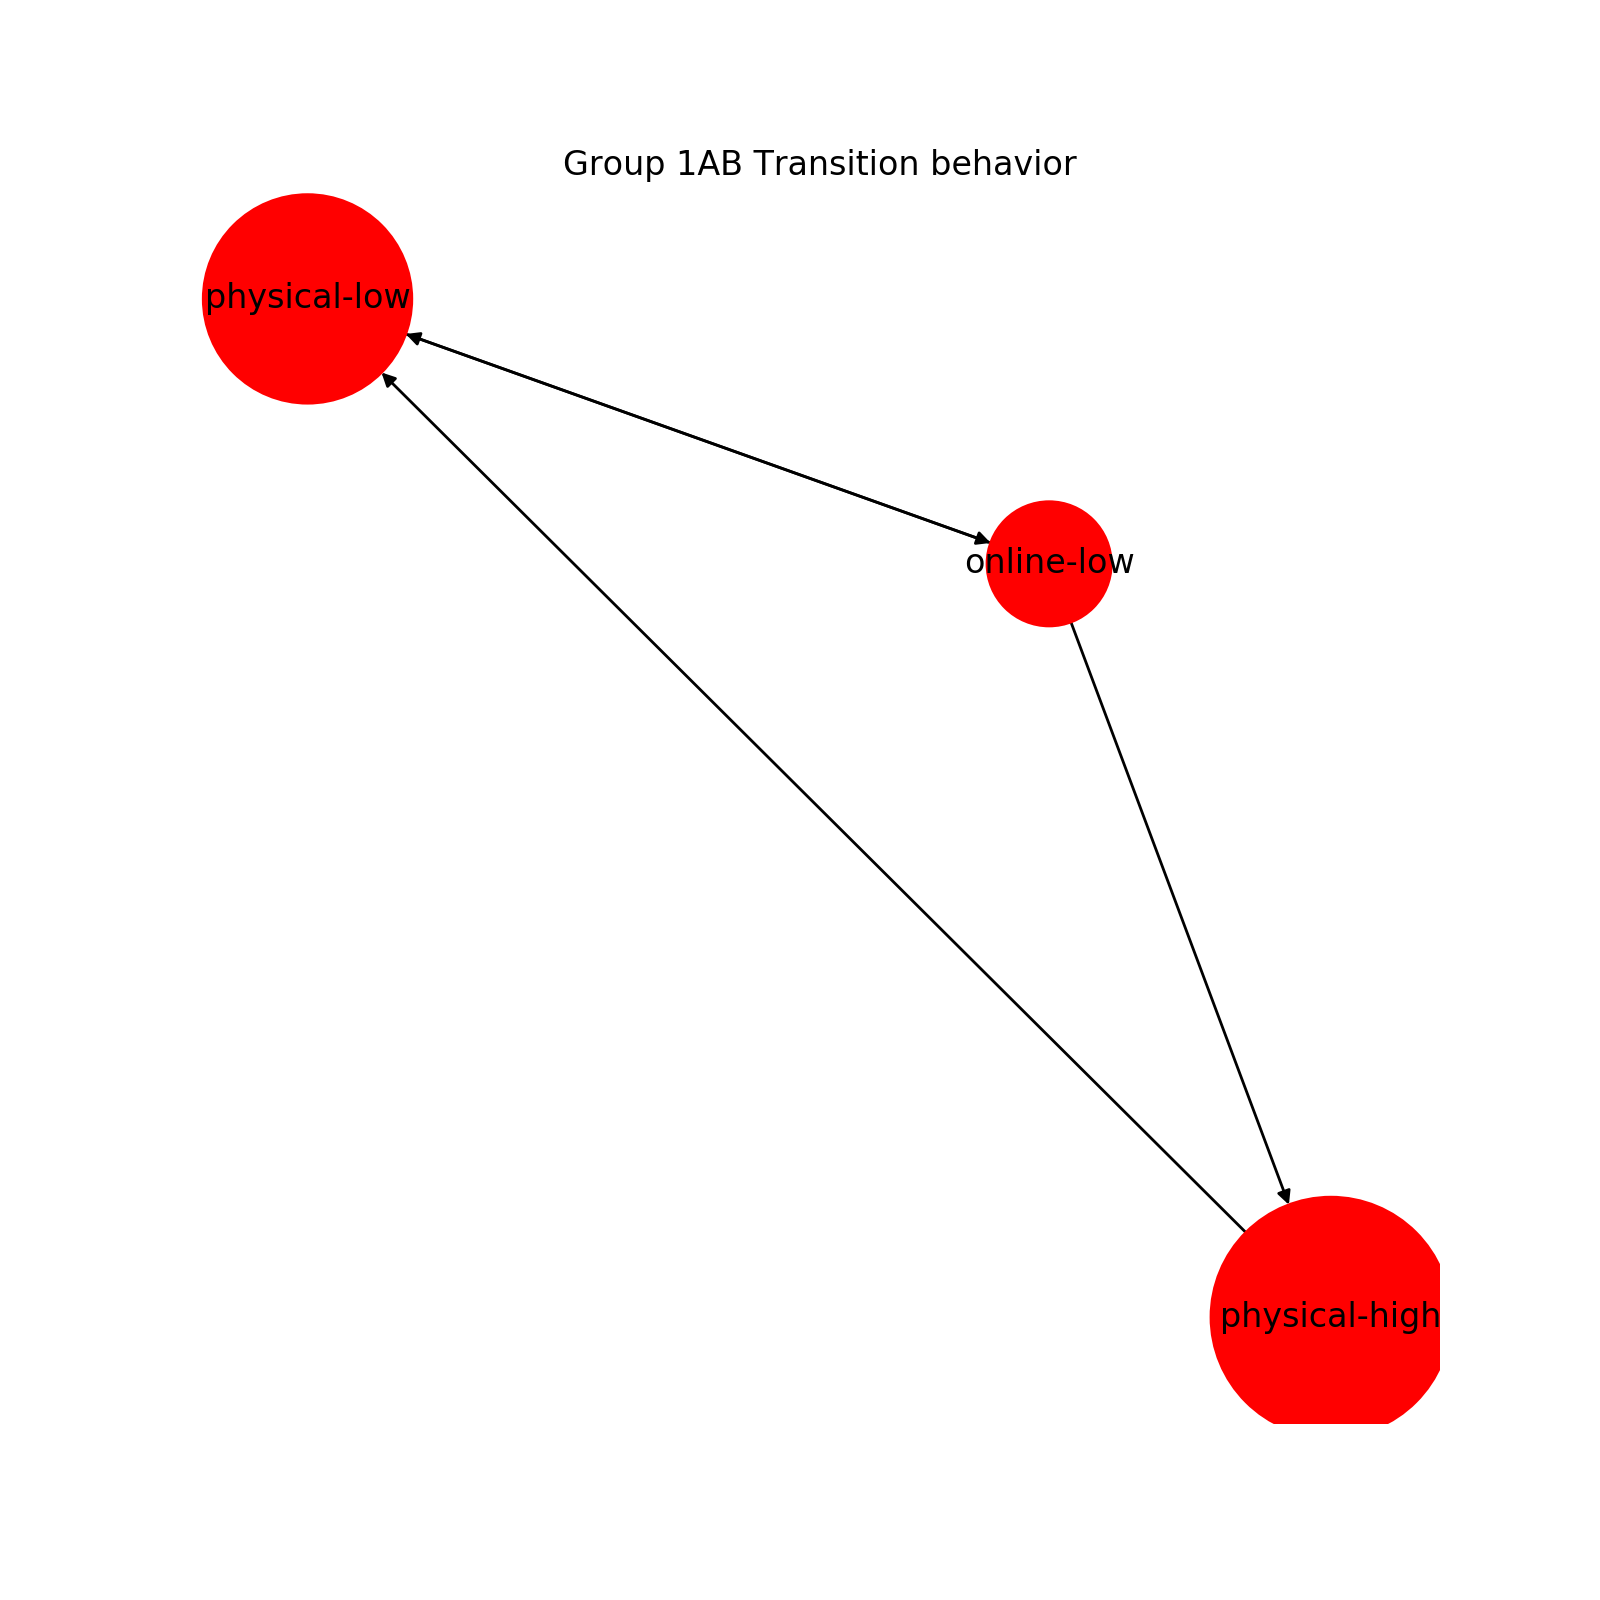

[5636.363636363636, 2000.0, 7454.545454545454, 2909.090909090909]


In [257]:
labels = {0:'physical-low',2:'online-low',3:'physical-high'}


prob,tr_prob = get_probs(clusters,seq)
plt.figure(figsize=(8,8))
plt.axis("off")
g = nx.DiGraph()
for i in range(len(prob)):
    for j in range(len(prob)):
        if tr_prob[i,j] !=0:
            g.add_edge(i,j,weight=tr_prob[i,j])
size =list()

for i in range(len(prob)):
    size.append(2000+prob[i]*10000)
nx.draw_networkx(g,labels=labels,with_labels=True,node_size=size)
plt.title('Group 1AB Transition behavior')    
plt.show()
plt.savefig('mfa_transition.png')
print size

# Analysis of 8th  Nov Project Day's data
In this section, I am processing the 8th November data provided by Shashi. I have followed the same process as applied in the previous section ( applying dimensionality reduction, clustering, and transitioning)

In [9]:
data_8 = pd.read_csv('Data_8th_Nov.csv')

# Deleting the first columns of sequence number
data_8.drop(data_8.columns[0],axis=1,inplace=True)

#print basic details
print 'Number of records :',data_8.shape[0]
print 'Number of attributes :',data_8.shape[1]
data_8['disengaged']

Number of records : 41
Number of attributes : 12


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
Name: disengaged, dtype: int64

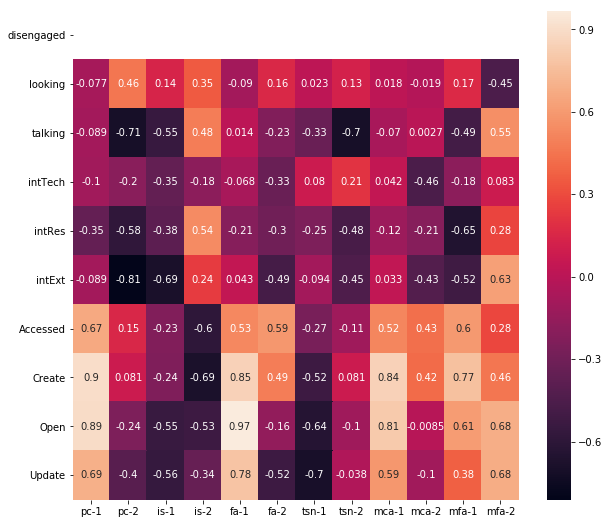

In [7]:
raw_data = data_8.drop(['timestamp','group'],axis=1)
# Stadardizing the dataset
std_rawdata = preprocessing.StandardScaler().fit_transform(raw_data)


# Building PCA
pca = decomposition.PCA(n_components = 2)

# Building Isomap
iso = Isomap(n_components = 2)

# Building Factor Analysis
fa = decomposition.FactorAnalysis(n_components = 2)

# Building t-SNE
tsne = TSNE(n_components = 2)

# Applying PCA on data 
pca_data2d = pca.fit_transform(std_rawdata)

# Applying Isomap on data
iso_data2d = iso.fit_transform(std_rawdata)


# Applying Factor Analysis on data
fa_data2d = fa.fit_transform(std_rawdata)

# Applying t-SNE on data
tsne_data2d = tsne.fit_transform(std_rawdata)

# on minmax scaling data
#pca_data2d = pca.fit_transform(min_rawdata)
#iso_data2d = iso.fit_transform(min_rawdata)
#fa_data2d = fa.fit_transform(min_rawdata)
#tsne_data2d = tsne.fit_transform(min_rawdata)




# Adding resultant dimensions of PCA to data
raw_data['pc-1'] = pca_data2d[:,0]
raw_data['pc-2'] = pca_data2d[:,1]

# Adding resultant dimensions of Isomap to data
raw_data['is-1'] = iso_data2d[:,0]
raw_data['is-2'] = iso_data2d[:,1]


# Adding resultant dimensions of Factor Analysis to data
raw_data['fa-1'] = fa_data2d[:,0]
raw_data['fa-2'] = fa_data2d[:,1]


# Adding resultant dimensions of t-SNE to data
raw_data['tsn-1'] = tsne_data2d[:,0]
raw_data['tsn-2'] = tsne_data2d[:,1]



# Adding MCA results ( As a separate library of python is used to produce MCA results and saved in mcaresults.csv file)
mca_df = pd.read_csv('mcaresult_8th.csv')

# Adding results from MCA and MFA
#mca_df = pd.read_csv('mcaresult2.csv')

mfa_df = pd.read_csv('mfaresult_8th.csv')


# Adding resultant dimensions of MCA to data
raw_data['mca-1'] = mca_df.iloc[:,1]
raw_data['mca-2'] = mca_df.iloc[:,2]


# Adding resultant dimensions of MFA to data
raw_data['mfa-1'] = mfa_df.iloc[:,1]
raw_data['mfa-2'] = mfa_df.iloc[:,2]


# Plotting correlation table 
plt.figure(figsize=(10,9))
sns.heatmap(raw_data.corr().iloc[0:10,-12:],annot=True)


In [10]:
# Kmeans over PCA results
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(raw_data.loc[:,'pc-1':'pc-2'])

#for i in range(len(data)):
#    ax.annotate((data.iloc[i,1],i),xy=(raw_data.iloc[i,10],raw_data.iloc[i,11]),xytext=(raw_data.iloc[i,10],raw_data.iloc[i,11]))

print kmeans1.cluster_centers_

[[-0.53912032 -0.86405468]
 [ 4.48651066  0.09944884]
 [-0.38516577  1.56457823]]


<IPython.core.display.Javascript object>


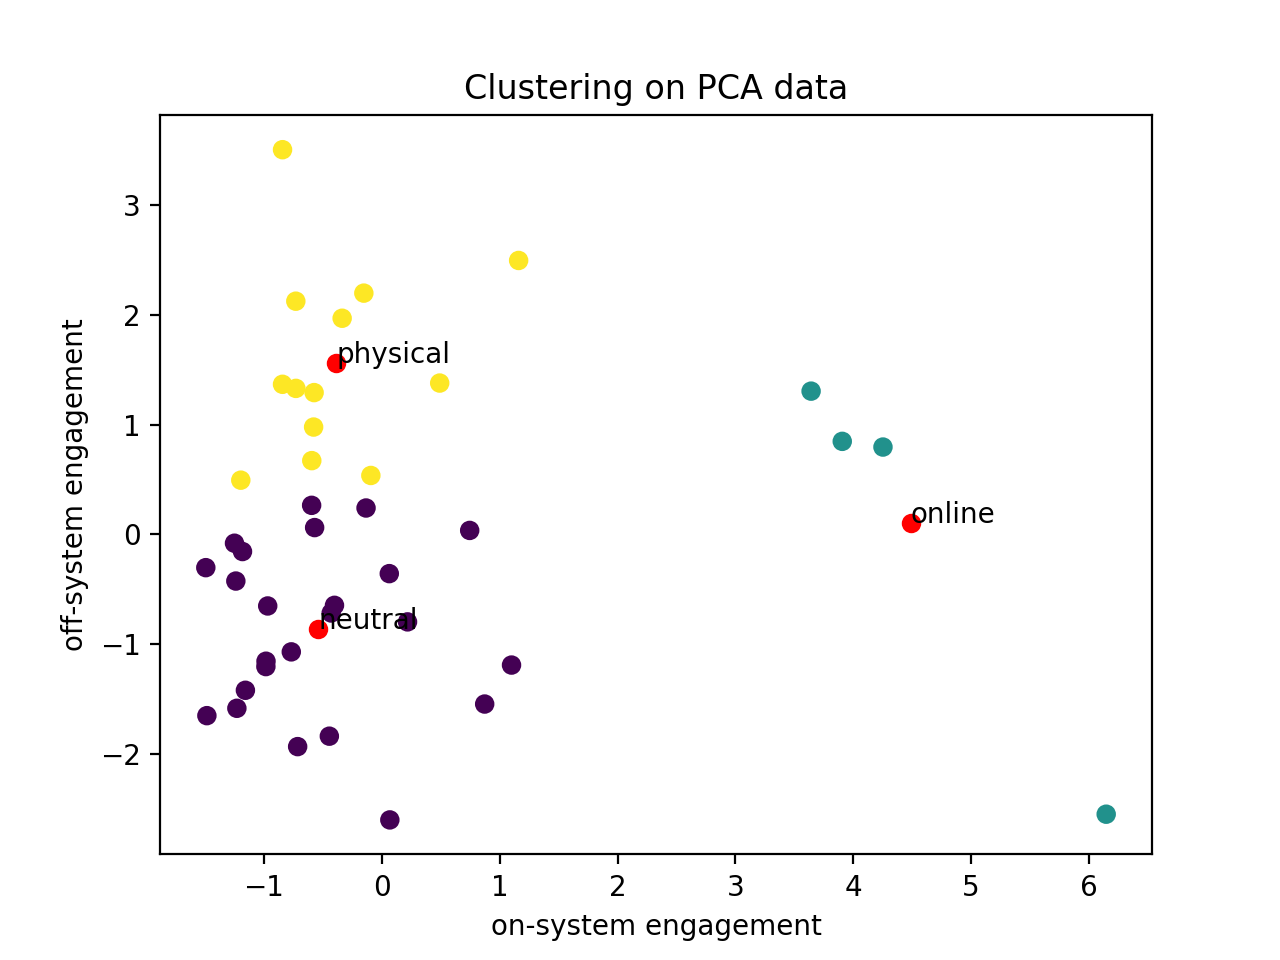

{0: 'neutral', 1: 'online', 2: 'physical'}
[[-0.53912032 -0.86405468]
 [ 4.48651066  0.09944884]
 [-0.38516577  1.56457823]]
[[-0.5391203168238338, -0.8640546810290406], [4.486510655351362, 0.09944884390875336], [-0.38516577058718726, 1.5645782283893823]]


In [12]:
%matplotlib notebook
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(raw_data.loc[:,'pc-1'],raw_data.loc[:,'pc-2'],c=kmeans1.labels_)

plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='red')

clusters = kmeans1.cluster_centers_.tolist()
for cluster in clusters:
    physical = 0
    online = 0
    neutral = 0
    for i in range(len(clusters)):
        if clusters[i][0]>0 and clusters[i][1]>0:
            online = i
        if clusters[i][0]<0 and clusters[i][1]>0:
            physical = i
    for i in range(len(clusters)):
        if i!=online and i!=physical:
            neutral=i
    labels = {physical:'physical',online:'online',neutral:'neutral'}

#cluster_names = ['physical-low','online-high','online-low','physical-high']
print(labels)
print(kmeans1.cluster_centers_)
print(clusters)

for i in range(len(kmeans1.cluster_centers_)):
    ax.annotate(labels[i],xy=(kmeans1.cluster_centers_[i,0] ,kmeans1.cluster_centers_[i,1]),xytext=(kmeans1.cluster_centers_[i,0] ,kmeans1.cluster_centers_[i,1]))

plt.xlabel('on-system engagement')
plt.ylabel('off-system engagement')
plt.title('Clustering on PCA data')
plt.show()

In [ ]:
"""
cat_data = data.copy()

cat_data['accessed_cat'] = pd.cut(data['Accessed'],bins=3,labels=False)
cat_data['create_cat'] = pd.cut(data['Create'],bins=3,labels=False)
cat_data['open_cat'] = pd.cut(data['Open'],bins=3,labels=False)
cat_data['update_cat'] = pd.cut(data['Update'],bins=3,labels=False)

cat_data.drop(['Accessed','Create','Open','Update'],axis=1,inplace=True)
cat_data.to_csv('datawithcat3.csv')
"""